<a href="https://colab.research.google.com/github/ToriStoner/DS4002-Project-2-/blob/main/Code%20for%20Random%20Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd



In [ ]:
df = pd.read_csv("Crime Data.csv")

In [ ]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


In [ ]:
df = df.drop(columns = ["Cross Street", "Status", "AREA", "Crm Cd", "Part 1-2", "Premis Cd", "Crm Cd 4", "Crm Cd 3", "Weapon Used Cd"])

In [ ]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Rpt Dist No,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Desc,Status Desc,Crm Cd 1,Crm Cd 2,LOCATION,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,Wilshire,784,VEHICLE - STOLEN,NaN,0,M,O,STREET,NaN,Adult Arrest,510.0,998.0,1900 S LONGWOOD AV,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,Central,182,BURGLARY FROM VEHICLE,1822 1402 0344,47,M,O,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,Invest Cont,330.0,998.0,1000 S FLOWER ST,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,Southwest,356,BIKE - STOLEN,0344 1251,19,X,X,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,Invest Cont,480.0,NaN,1400 W 37TH ST,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,Van Nuys,964,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,19,M,O,CLOTHING STORE,NaN,Invest Cont,343.0,NaN,14000 RIVERSIDE DR,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,Hollywood,666,THEFT OF IDENTITY,1822 1501 0930 2004,28,M,H,SIDEWALK,NaN,Invest Cont,354.0,NaN,1900 TRANSIENT,34.0944,-118.3277


In [ ]:
#Using Random Forest to make predictions

#https://www.datacamp.com/tutorial/random-forests-classifier-python

import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [ ]:
df['date'] = pd.to_datetime(df['DATE OCC'])  # Convert 'date' column to datetime
df_grouped = df.groupby([df['date'].dt.to_period('M'), 'AREA NAME', "Crm Cd Desc", "Vict Sex", "Vict Descent", "Premis Desc", "Weapon Desc", "Status Desc"]).size().reset_index(name='crime_count')

# Convert the period back to datetime for proper time handling
df_grouped['date'] = df_grouped['date'].dt.to_timestamp()

# Step 2: Define Features and Target
# Features will include the date (month, day, year), location, and any other relevant columns
df_grouped['month'] = df_grouped['date'].dt.month  # Extract month
df_grouped['day'] = df_grouped['date'].dt.day  # Extract day
df_grouped['year'] = df_grouped['date'].dt.year  # Extract year

<ipython-input-11-c02ee8d2afb8>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['DATE OCC'])  # Convert 'date' column to datetime


In [ ]:
df_grouped.head()

,date,AREA NAME,Crm Cd Desc,Vict Sex,Vict Descent,Premis Desc,Weapon Desc,Status Desc,crime_count,month,day,year
0,2020-01-01,77th Street,ARSON,M,B,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",FIRE,Invest Cont,1,1,1,2020
1,2020-01-01,77th Street,ARSON,M,H,STREET,FIRE,Invest Cont,1,1,1,2020
2,2020-01-01,77th Street,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",F,A,STREET,AIR PISTOL/REVOLVER/RIFLE/BB GUN,Invest Cont,1,1,1,2020
3,2020-01-01,77th Street,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",F,B,ALLEY,HAND GUN,Invest Cont,1,1,1,2020
4,2020-01-01,77th Street,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",F,B,GAS STATION,BOTTLE,Adult Other,1,1,1,2020


In [ ]:
features = ['AREA NAME', "Crm Cd Desc", "Vict Sex", "Vict Descent", "Premis Desc", "Weapon Desc", "Status Desc"]
X = df_grouped[features]
y = df_grouped['crime_count']

X = pd.get_dummies(X, columns=['AREA NAME', "Crm Cd Desc", "Vict Sex", "Vict Descent", "Premis Desc", "Weapon Desc", "Status Desc"], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step 4: Train Random Forest Model - Regression
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 5: Predictions and Model Evaluation
y_pred = rf_model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Random Forest RMSE: {rmse}')

Random Forest RMSE: 0.562327403352614


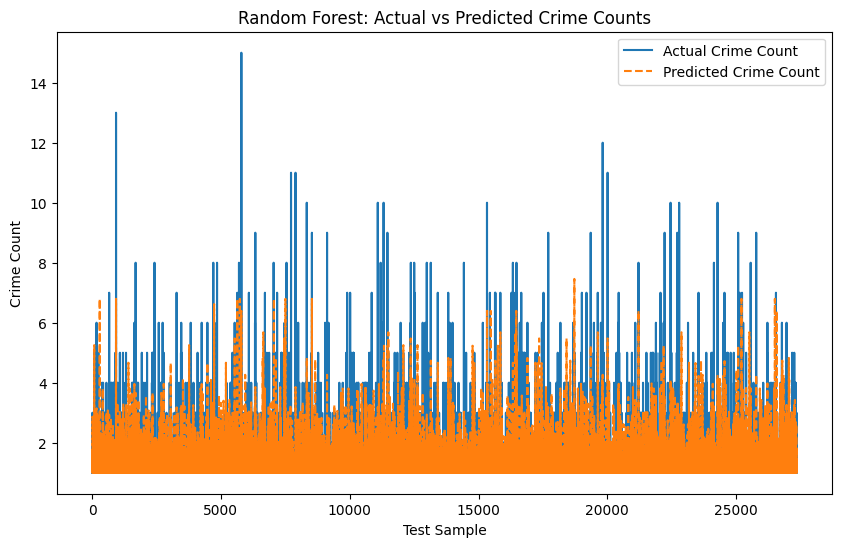

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 6: Visualize Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Crime Count')
plt.plot(y_pred, label='Predicted Crime Count', linestyle='--')
plt.title('Random Forest: Actual vs Predicted Crime Counts')
plt.xlabel('Test Sample')
plt.ylabel('Crime Count')
plt.legend()
plt.show()

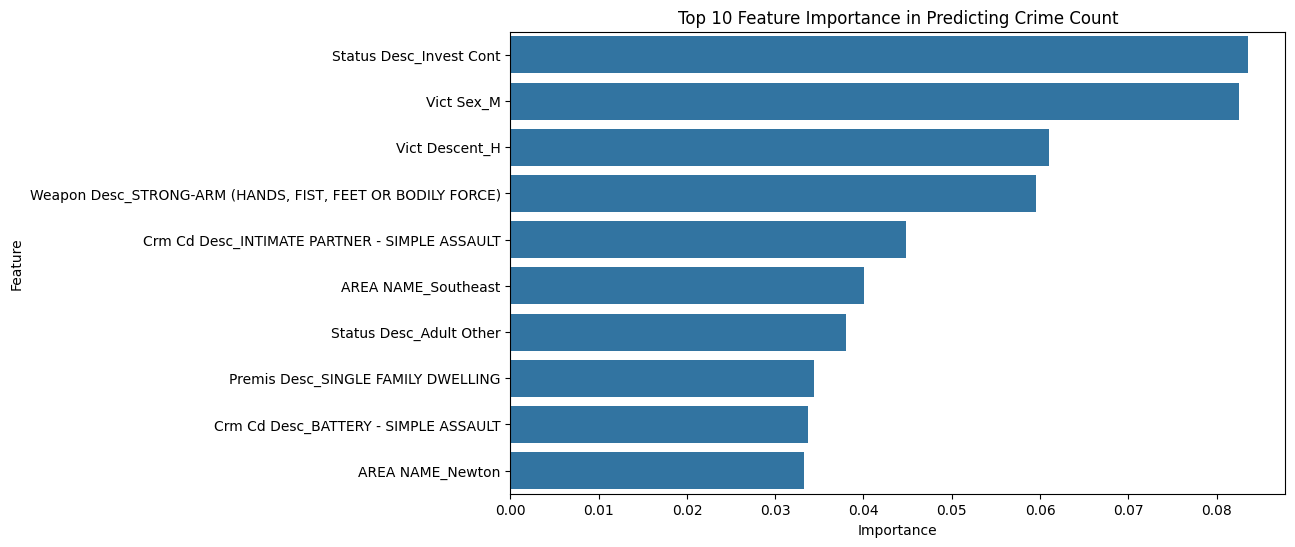

In [ ]:
# Step 7: Feature Importance
feature_importances = rf_model.feature_importances_
features_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
features_df = features_df.sort_values(by='Importance', ascending=False)

# Sort by importance and take the top 10
top_features_df = features_df.sort_values(by='Importance', ascending=False).head(10)

# Plot Importance (Top 10)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_features_df)
plt.title('Top 10 Feature Importance in Predicting Crime Count')
plt.show()